<a href="https://colab.research.google.com/github/riyabhatnagar021/HappyFace_or_Unhappy_Face/blob/master/Are_you_Happy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile
a=zipfile.ZipFile('drive/My Drive/project_data/happy-house-dataset.zip','r')
a.extractall()

In [0]:
import h5py
import numpy as np

In [0]:
def load_dataset():
  train_data=h5py.File('train_happy.h5','r')
  x_train=np.array(train_data['train_set_x'][:])
  y_train=np.array(train_data['train_set_y'][:])
  
  test_data=h5py.File('test_happy.h5','r')
  x_test = np.array(test_data["test_set_x"][:])
  y_test = np.array(test_data["test_set_y"][:])
  
  y_train=y_train.reshape(1,y_train.shape[0])
  y_test = y_test.reshape(1, y_test.shape[0])
  
  return x_train,y_train,x_test,y_test


In [0]:
X_train,y_train,X_test,y_test=load_dataset()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0]')

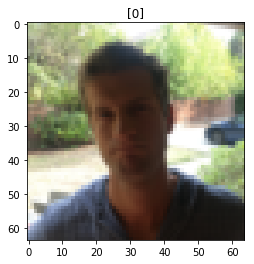

In [0]:
import matplotlib.pyplot as plt
index=10
plt.imshow(X_train[index])
plt.title(y_train[:,index])

In [0]:
X_train.shape

(600, 64, 64, 3)

In [0]:
X_train=X_train/255
X_test=X_test/255


In [0]:
X_train.shape

(600, 64, 64, 3)

In [0]:
y_train=y_train.T
y_test=y_test.T

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout
from keras.layers.normalization import BatchNormalization




In [0]:
model=Sequential()

model.add(Conv2D(64,(5,5),activation='relu',padding='Same',input_shape = (64,64,3)))
# model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,(5,5),activation='relu',padding='Same'))
# model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(units=1,kernel_initializer="uniform", activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [0]:
model.fit(X_train,y_train,batch_size=20, epochs=100,validation_data=(X_test,y_test))

Train on 600 samples, validate on 150 samples
Epoch 1/100
600/600 [==============================] - 1s 2ms/step - loss: 0.6866 - acc: 0.5367 - val_loss: 0.6476 - val_acc: 0.6867
Epoch 2/100
600/600 [==============================] - 0s 596us/step - loss: 0.5697 - acc: 0.7217 - val_loss: 0.5537 - val_acc: 0.7867
Epoch 3/100
600/600 [==============================] - 0s 601us/step - loss: 0.4209 - acc: 0.8150 - val_loss: 0.3995 - val_acc: 0.8333
Epoch 4/100
600/600 [==============================] - 0s 604us/step - loss: 0.2741 - acc: 0.8917 - val_loss: 0.3020 - val_acc: 0.8867
Epoch 5/100
600/600 [==============================] - 0s 588us/step - loss: 0.2541 - acc: 0.9017 - val_loss: 0.2062 - val_acc: 0.9200
Epoch 6/100
600/600 [==============================] - 0s 606us/step - loss: 0.1989 - acc: 0.9267 - val_loss: 0.1829 - val_acc: 0.9333
Epoch 7/100
600/600 [==============================] - 0s 596us/step - loss: 0.1573 - acc: 0.9317 - val_loss: 0.3280 - val_acc: 0.8400
Epoch 8/100

In [0]:
import cv2
from keras.preprocessing import image

 Prediction : Happy Face


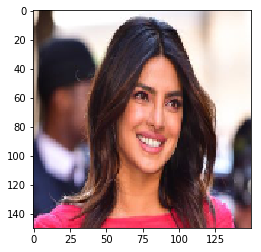

In [0]:

def prepare(filepath):
  
  img_size=64
  img_array=cv2.imread(filepath,cv2.IMREAD_COLOR)
  
  new_array=cv2.resize(img_array,(img_size,img_size))
  
  we=new_array.reshape(-1,img_size,img_size,3)
  
  
  return we

my_img='nobi.jpg'
prediction=model.predict([prepare(my_img)])

img = image.load_img(my_img, target_size=(150, 150))
plt.imshow(img)

# print(prediction)
if prediction[0]==1:
  print(' Prediction : Happy Face')
else:
  print('Prediction: Unhappy Face')

  


In [0]:
model.save_weights('Happy_Face.h5')